In [2]:
# run in admin shell
# run for first install of venv and restart venv: python -m ipykernel install --user --name=myenv
!pip install opencv-python
!pip install tensorflow

In [3]:
import cv2
import uuid
import os
import time
import random
import glob
import tensorflow
tensorflow.__version__

'2.6.0'

In [5]:
labels=['flower']
num_imgs = 10

In [6]:
IMG_PATH = os.path.join('Tensorflow','workspace','images','collectedimages')

In [7]:
if not os.path.exists(os.getcwd()):
    !mkdir {IMG_PATH}
    print(IMG_PATH)

In [8]:
for label in labels:
    path = os.path.join(IMG_PATH,label)
    if not os.path.exists(path):
        !mkdir {path}
        print(path)

In [9]:
!pip install pyqt5 lxml
#for vm problems

In [10]:
LABEL_PATH = os.path.join('Tensorflow','labelimg')

In [11]:
if not os.path.exists(LABEL_PATH):
    !mkdir {LABEL_PATH}
    print(LABEL_PATH)
    !git clone https://github.com/tzutalin/labelImg.git {LABEL_PATH}

In [13]:
!cd {LABEL_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [14]:
# !cd {LABEL_PATH} && python labelImg.py
#open application

In [15]:
TEST_PATH = os.path.join('Tensorflow','workspace','images','Test')
print(TEST_PATH)
TRAIN_PATH = os.path.join('Tensorflow','workspace','images','Train')
print(TRAIN_PATH)

Tensorflow\workspace\images\Test
Tensorflow\workspace\images\Train


In [16]:
# for subdir, dirs, files in os.walk(IMG_PATH):
#     for file in files:
#         print(os.path.join(subdir, file))
#         len(files)
FLOWER_PATH = os.path.join(IMG_PATH,'flower')
imgid=[]
for pictures in glob.glob((FLOWER_PATH+'\*.jpg'),recursive=True):
    imgid.append(os.path.basename(pictures)[:-4])
random.shuffle(imgid)
imgid

['813445367_187ecf080a_n',
 '4790631791_21e9648097_n',
 '5632774792_0fa33d17eb_n',
 '3637428148_a1dcccafa9_n',
 '144099102_bf63a41e4f_n',
 '6596277835_9f86da54bb',
 '4065883015_4bb6010cb7_n',
 '2538504987_fe524b92a8_n',
 '105806915_a9c13e2106_n',
 '144076848_57e1d662e3_m']

In [17]:
# make train and test directory
# if already exists, override with blank directory
if os.path.exists(TRAIN_PATH):
    if os.name == 'nt':
        !rd /s /q {TRAIN_PATH}
    else:
        !rm {TRAIN_PATH}
!mkdir {TRAIN_PATH}

if os.path.exists(TEST_PATH):
    if os.name == 'nt':
        !rd /s /q {TEST_PATH}
    else:
        !rm {TEST_PATH}
!mkdir {TEST_PATH}


# 8/2 tts

for trainimg in imgid[:8]:
    # copy jpg
    START_PATH = os.path.join(FLOWER_PATH,trainimg)+'.jpg'
    DEST_PATH = os.path.join(TRAIN_PATH,trainimg)+'.jpg'
    print(START_PATH)
    print(DEST_PATH)
    if os.name == 'nt':
        !copy {START_PATH} {DEST_PATH}
    else:
        !cp {START_PATH} {DEST_PATH}
    # copy xml
    START_PATH = os.path.join(FLOWER_PATH,trainimg)+'.xml'
    DEST_PATH = os.path.join(TRAIN_PATH,trainimg)+'.xml'
    print(START_PATH)
    print(DEST_PATH)
    if os.name == 'nt':
        !copy {START_PATH} {DEST_PATH}
    else:
        !cp {START_PATH} {DEST_PATH}

for testimg in imgid[:2]:
    # copy jpg
    START_PATH = os.path.join(FLOWER_PATH,testimg)+'.jpg'
    DEST_PATH = os.path.join(TEST_PATH,testimg)+'.jpg'
    print(START_PATH)
    print(DEST_PATH)
    if os.name == 'nt':
        !copy {START_PATH} {DEST_PATH}
    else:
        !cp {START_PATH} {DEST_PATH}
    # copy xml
    START_PATH = os.path.join(FLOWER_PATH,testimg)+'.xml'
    DEST_PATH = os.path.join(TEST_PATH,testimg)+'.xml'
    print(START_PATH)
    print(DEST_PATH)
    if os.name == 'nt':
        !copy {START_PATH} {DEST_PATH}
    else:
        !cp {START_PATH} {DEST_PATH}

Tensorflow\workspace\images\collectedimages\flower\813445367_187ecf080a_n.jpg
Tensorflow\workspace\images\Train\813445367_187ecf080a_n.jpg
        1 file(s) copied.
Tensorflow\workspace\images\collectedimages\flower\813445367_187ecf080a_n.xml
Tensorflow\workspace\images\Train\813445367_187ecf080a_n.xml
        1 file(s) copied.
Tensorflow\workspace\images\collectedimages\flower\4790631791_21e9648097_n.jpg
Tensorflow\workspace\images\Train\4790631791_21e9648097_n.jpg
        1 file(s) copied.
Tensorflow\workspace\images\collectedimages\flower\4790631791_21e9648097_n.xml
Tensorflow\workspace\images\Train\4790631791_21e9648097_n.xml
        1 file(s) copied.
Tensorflow\workspace\images\collectedimages\flower\5632774792_0fa33d17eb_n.jpg
Tensorflow\workspace\images\Train\5632774792_0fa33d17eb_n.jpg
        1 file(s) copied.
Tensorflow\workspace\images\collectedimages\flower\5632774792_0fa33d17eb_n.xml
Tensorflow\workspace\images\Train\5632774792_0fa33d17eb_n.xml
        1 file(s) copied.
Te

In [18]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [19]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [20]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [21]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [22]:
if os.name=='nt':
    !pip install wget
    import wget

In [23]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [25]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    if not os.path.exists(paths['PROTOC_PATH']):
        !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
        !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
        os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
        !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733Obtaining file:///C:/Users/01bba/code/flowermodel/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [32]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf
!pip install matplotlib
!pip install PyYAML
!pip install Pillow
!pip install pytz

Found existing installation: matplotlib 3.4.3
Uninstalling matplotlib-3.4.3:
  Successfully uninstalled matplotlib-3.4.3


  Using cached protobuf-3.18.1-cp39-cp39-win_amd64.whl (912 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.6.0 requires matplotlib, which is not installed.
tensorflow-datasets 4.4.0 requires promise, which is not installed.
tensorflow-datasets 4.4.0 requires tensorflow-metadata, which is not installed.
tensorflow-datasets 4.4.0 requires tqdm, which is not installed.
apache-beam 2.33.0 requires avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you have avro-python3 1.10.2 which is incompatible.
tensorflow-text 2.7.0rc0 requires tensorflow<2.8,>=2.7.0rc0, but you have tensorflow 2.6.0 which is incompatible.


  Using cached matplotlib-3.4.3-cp39-cp39-win_amd64.whl (7.1 MB)


In [33]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.7: C:\Users\01bba\code\flowermodel\flowerod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-17 02:34:50.442155: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-17 02:34:50.962155: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2776 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:2a:00.0, compute capability: 6.1
C:\Users\01bba\code\flowermodel\flowerod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Bu

In [34]:
import object_detection

In [35]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  7% [.....                                                                   ]  1449984 / 20515344

 16% [............                                                            ]  3448832 / 20515344

 26% [...................                                                     ]  5513216 / 20515344

 38% [...........................                                             ]  7864320 / 20515344

 56% [........................................                                ] 11599872 / 20515344

 83% [............................................................            ] 17121280 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [37]:
labels = [{'name':'flower', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [38]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [39]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [40]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [41]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [42]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [43]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [44]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [45]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [46]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [47]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [48]:
!pip uninstall pycocotools -y
!pip install pycocotools
!pip install gin-config==0.1.1
# !pip install tensorflow_addons
!pip install tensorflow-gpu

Found existing installation: pycocotools 2.0.2
Uninstalling pycocotools-2.0.2:
  Successfully uninstalled pycocotools-2.0.2
  Using cached pycocotools-2.0.2-cp39-cp39-win_amd64.whl


In [49]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [50]:
#!{command} running in notebook but can run above command in terminal to see progress

In [51]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [52]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [53]:
# go to /Tensorflow/workspace/models/my_ssd_mobnet/train
# run tensorboard --logdir=.
# run cd ..
# and cd into eval
# and run the same command to see the evaluation metrics


In [54]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [55]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial() #set the right checkpoint from myssdmobnet

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [56]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [57]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [58]:
IMAGE_PATH = os.path.join('C:/Users/01bba/code/flowermodel/flowers/daisy', '34539556222_f7ba32f704_n.jpg')

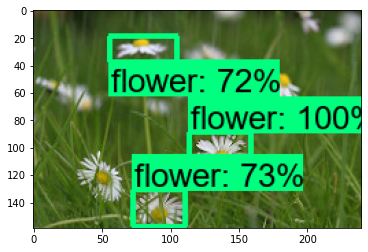

In [59]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.7,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [60]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [61]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [62]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [75]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [76]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [77]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport
